# Data Manipulation with pandas
Instructor:   
Note taker: Paris Zhang on Friday, Aug 7, 2020

**Course structure**
1. DataFrames
  + Sorting and subsetting
  + Creating new columns
2. Aggregating data
  + Summary statistics
  + Counting
  + Grouped summary statistics
3. Slicing and indexing data
  + Subseting using slicing
  + Indexes and subsetting using indexes
4. Creating and visualizing data
  + Plotting
  + Handling missing data
  + Reading data into a DataFrame
  
## Chapter 1 - DataFrames
### 1.1 Intro to DataFrame
* Fundamental methods/attributes: `.head()`, `.info()`, `.shape`, `.describe()`
* Components of a DataFrame: `.values`, `.columns` and `.index`:
  + `.columns` returns `Index(['name','breed'])`
  + `.index` returns `RangeIndex(start=0, stop=7, step=1)`

### 1.2 Sorting and subsetting
* Sorting with `.sort_values()` - `dt.sort_values("weight_kg")`
* Soring in descending order - `dt.sort_values("weight_kg", ascending=False)`
* Sorting multiple variables - `dt.sort_values([var1, var2], ascending=[True, False])`
* Subsetting columns - `dt[var]`
* Subsetting multiple columns - `dt[[var1, var2]]`
* Subsetting using `.isin()` - `dt[dt[var].isin(["A","B"])]`

## Chapter 2 - Aggregating Data
### 2.1 Summary statistics
* `.median()`, `.mode()`, `.min()`, `.max()`, `.var()`, `.std()`, `.sum()`, `.quantile()`
* Use `.agg()` method in a function

In [ ]:
def pct30(column):
    return column.quantile(0.3)

def pct40(column):
    return column.quantile(0.4)

# Single summary
dogs["weight_kg"].agg(pct30)
# Single summary for multiple columns
dogs[["weight_kg","height_cm"]].agg(pct30)
# Multiple summaries
dogs["weight_kg"].agg([pct30, pct40])

* Cumulative statistics - `.cumsum()`, `.cummax()`, `.cummin()`, `.cumprod()`

### 2.2 Counting
* Dropping duplicate names, `.drop_duplicates()` - `vet_visits.drop_duplicates(subset="name")`
* Dropping duplicate pairs - `vet_visits.drop_duplicates(subset=["name","breed"])`
* Counting, `.value_counts()` - `dt[var].value_counts(sort=True)`, other arguments `normalize=True`

### 2.3 Grouped summary statistics
* Grouped summaries, `.groupby()` - `dogs.groupby("color")["weight_kg"].mean()`
* Multiple grouped summaries - `dogs.groupby("color")["weight_kg"].agg([min, max, sum])`
* Grouping by multiple variables - `dogs.groupby(["color","breed"])["weight_kg"].mean()`
* Many groups, many summaries:
  + `dogs.groupby(["color","breed"])[["weight_kg","height_cm"]].mean()`

### 2.4 Pivot tables
* From `.groupby()` to `.pivot_table()`
  + `dogs.groupby("color")["weight_kg"].mean()`
  + `dogs.pivot_table(values="weight_kg",index="color")`
* Different statistics:

In [ ]:
import numpy as np

dogs.pivot_table(values="weight_kg", index="color", aggfunc=np.median)
dogs.pivot_table(values="weight_kg", index="color", aggfunc=[np.mean, np.median])

* Pivot on two variables (calculates mean):
  + `dogs.groupby(["color","breed"])["weight_kg"].mean()`
  + `dogs.pivot_table(values="weight_kg", index="color", columns="breed")`
* Filling missing values in pivottables:
  + `dogs.pivot_table(values="weight_kg", index="color", columns="breed", fill_value=0)`
* Summing with two pivot tables - argument `margins=True`

## Chapter 3 - Slicing and indexing

### 3.1 Explicit indexes
* `.columns` returns an index list of column names and the data type
  + Input = `dog.columns`, output = `Index(['name','breed','color','height_cm','weight_kg'], dtype='object')`
* `.index` returns a range index
  + Input = `dog.index`, output = `RangeIndex(start=0, stop=7, step=1)`
* Setting a column as the index, `.set_index()` - `dogs.set_index("name")`. **Index values don't need to be unique**.
* Removing an index - `dogs_ind.reset_index()`
* Dropping an index - `dogs_ind.reset_index(drop=True)`
* Subsetting with index:
  + `dogs[dogs["name"].isin(["Bella","Stella"])]`
  + `dogs_ind.loc[["Bella","Stella"]]`
* Subsetting on duplicated - `dogs_ind2.loc["Labrador"]` returns two rows with the same index "Labrador"
* Multi-level / Hierarchical indexes - `dogs.set_index(["breed","color"])`
* Subset the outer level with a list - `dogs_ind3.loc[["Labrador","Chihuahua"]]`
* Subsetinner levels with a list oftuples - `dogs_ind3.loc[[("Labrador","Brown"), ("Chihuahua","Tan")]]`
* Sorting by index values - `.sort_index()`.
* Controlling `.sort_index()` - `dogs_ind3.sort_index(level=["color","breed"], ascending=[True, False])`
  + You can only slice an index if the index is sorted (using `.sort_index()`).
  + To slice at the outer level, `first` and `last` can be strings.
  + To slice at inner levels, `first` and `last` should be tuples.
  + If you pass a single slice to `.loc[]`, it will slice the rows.

### 3.2 Slicing and subsetting with `.loc` and `.iloc`
* Sort the index before slicing - `dogs.set_index(["breed","color"]).sort_index()`
* Slicing the outer index level - `dogs_srt.loc["Chow Chow":"Poodle"]`, the final value "Poodle" is included
* Slicing the inner index levels - `dogs_srt.loc[("Labrador","Brown"):("Schnauzer","Grey")]`
* Slicing columns - `dogs_srt.loc[:,"name":"height_cm"]`
* Slicing by partial dates - `dogs.loc["2014":"2016"]`
* Subsetting by row/column number - `print(dogs.iloc[2:5, 1:4])`

### 3.3 Working with pivot tables
* Calculating summary statistics by row - `.mean(axis="index")`, by column - `.mean(axis="columns")`


## Chapter 4 - Creating and Visualizing DataFrames

### 4.1 Visualizing data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)
    
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


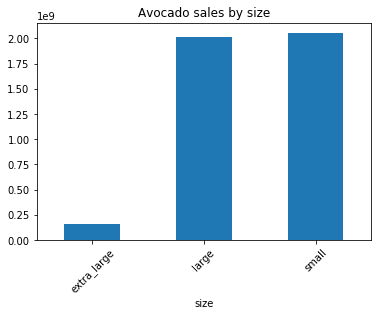

In [11]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

nb_sold_by_size.plot(kind='bar',title="Avocado sales by size",rot=45)
plt.show()

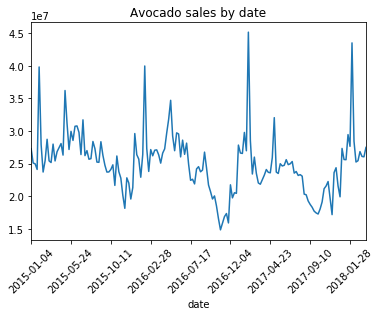

In [14]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.set_index("type").groupby("date")["nb_sold"].sum()

nb_sold_by_date.plot(kind="line",title="Avocado sales by date",rot=45)
plt.show()

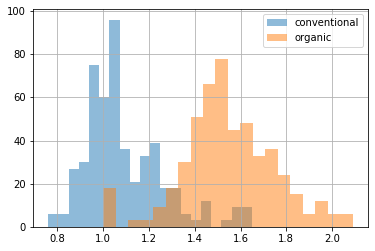

In [15]:
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)
plt.legend(["conventional", "organic"])
plt.show()

### 4.2 Missing values
* Detecting missing values with `.isna()` returns a boolean DataFrame
* Detecting missing values with `.isna().any()` returns a boolean vector that shows if a column has missing values or not
* Counting missing values - `.isna().sum()`
* Plotting missing values - `.isna().sum().plot(kind="bar")`
* Removing missing values - `.dropna()`
* Replacing missing values - `.fillna(0)`

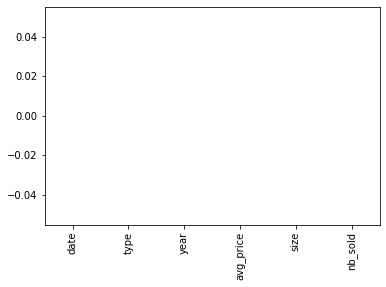

In [16]:
avocados.isna().sum().plot(kind="bar")
plt.show()

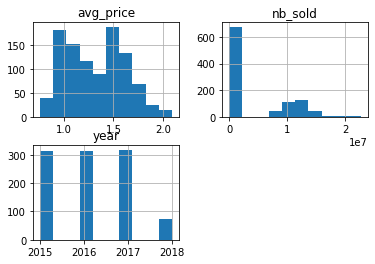

In [18]:
avocados.hist()
plt.show()

### 4.3 Creating DataFrames

In [19]:
# Definition of a dictionary:
my_dict = {
"title": "Charlotte's Web",
"author": "E.B. White",
"published": 1952
}
print(my_dict)

{'title': "Charlotte's Web", 'author': 'E.B. White', 'published': 1952}


Constructing a DataFrame:
  + From a list of dictionaries - Constructed row by row
  + From a dictionary of lists - Constructed column by column

In [20]:
# List of dictionaries - by row
list_of_dicts = [
    {"name": "Ginger",
     "breed": "Dachshund",
     "height_cm": 22,
     "weight_kg": 10,
     "date_of_birth": "2019-03-14"},
    
    {"name": "Scout",
     "breed": "Dalmatian",
     "height_cm": 59,
     "weight_kg": 25,
     "date_of_birth": "2019-05-09"}
]
new_dogs = pd.DataFrame(list_of_dicts)
print(new_dogs)

     name      breed  height_cm  weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-14
1   Scout  Dalmatian         59         25    2019-05-09


In [21]:
# Dictionary of lists - by column
dict_of_lists = {
    "name": ["Ginger","Scout"],
    "breed": ["Dachshund","Dalmatian"],
    "height_cm": [22, 59],
    "weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14","2019-05-09"]
}
new_dogs = pd.DataFrame(dict_of_lists)
print(new_dogs)

     name      breed  height_cm  weight_kg date_of_birth
0  Ginger  Dachshund         22         10    2019-03-14
1   Scout  Dalmatian         59         25    2019-05-09


### 4.4 Reading and writing CSVs
* Read csv - `pd.read_csv()`
* Write csv - `DataFrame.to_csv()`